<p> <br> <p> <br>  <p> <br>  <p>
<hr>
# Κεφάλαιο 5
<hr>
<p> <br> <p> <br>  <p> <br>  <p>

# 5. Γραμμική Άλγεβρα 

## 5.1 Βασικές έννοιες της γραμμικής άλγεβρας στο Sage

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το Sage μας παρέχει όλες τις καθιερωμένες μαθηματικές έννοιες της γραμμικής άλγεβρας, όπως το χαρακτηριστικό και ελάχιστο πολυώνυμο, την ανηγμένη κλιμακωτή μορφή, διάφορες αναλύσεις ενός πίνακα κλπ. <br> <br>

Η δημιουργία διανυσμάτων και πινάκων στο Sage γίνεται με άμεσο και φυσικό τρόπο
</p>

In [1]:
A = Matrix([[1,2,3],[3,2,1],[1,1,1]])
w = vector([1,1,-4])
print w*A; print A*w

(0, 0, 0)
(-9, 1, -2)


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Στο Sage ο πυρήνας ενός πίνακα $A$ (ή καλύτερα μιας γραμμικής απεικόνισης) είναι από προεπιλογή τα διανύσματα $w$, τέτοια ώστε $w\,A=0$, δηλαδή με πολλαπλασιασμό από αριστερά. Για να πάρουμε το αποτέλεσμα με πολλαπλασιασμό από δεξιά χρησιμοποιούμε την μέθοδο <code>right_kernel</code>
</p>

In [2]:
print A.kernel() ; print A.right_kernel()

Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 1  1 -4]
Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 1 -2  1]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Για γρήγορη επίλυση γραμμικών συστημάτων χρησιμοποιούμε την μέθοδο <code>solve_right</code>. Υπολογίζοντας το
<code>A.solve_right(Y)</code> το Sage μας επιστρέφει ένα διάνυσμα $X$ τέτοιο ώστε $A\,X=Y$ :
</p>

In [3]:
Y = vector([0, -4, -1])
X = A.solve_right(Y); print X; print A*X==Y

(-2, 1, 0)
True


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Εναλλακτικά, αντί για την μέθοδο  <code>solve_right</code> μπορούμε να χρησιμοποιήσουμε τον χαρακτήρα backslash ( \ ) 
</p>

In [4]:
print A\Y

(-2, 1, 0)


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Αν το γραμμικό σύστημα δεν έχει λύση (είναι ασυμβίβαστο) τότε to Sage μας επιστρέφει λάθος
</p>

<code>A.solve_right(w)
......
<font color="red">ValueError:</font> matrix equation has no solutions </code>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Όταν θέλουμε να επιλύσουμε ένα σύστημα γραμμικών εξισώσεων, τo Sage έχει την εντολή <code>pivots</code> για να πάρουμε με γρήγορο τρόπο σε ποιές στήλες βρίσκονται οι εξαρτημένες μεταβλητές. Για παράδειγμα, με τα παρακάτω ορίζουμε τον πίνακα που απαρτίζεται από τους συντελεστές ενός γραμμικού συστήματος το οποίο θέλουμε να επιλύσουμε. Στη συνέχεια θεωρούμε τον επαυξημένο πίνακα και ζητάμε από το Sage να μας πει σε ποιές στήλες είναι οι εξαρτημένες μεταβλητές. Τέλος  ζητάμε να μας δώσει την ανηγμένη κλιμακωτή μορφή του επαυξημένου πίνακα.
</p>

In [5]:
coeff = matrix(QQ, [[ 1,  4, 0, -1,  0,   7, -9],
                    [ 2,  8,-1,  3,  9, -13,  7],
                    [ 0,  0, 2, -3, -4,  12, -8],
                    [-1, -4, 2,  4,  8, -31, 37]])
const = vector(QQ, [3, 9, 1, 4])
aug = coeff.augment(const,subdivide=True)
print aug ; print str('----------------------------------------')
dependent = aug.pivots()
print str('σε ποιές στήλες είναι οι εξαρτημένες μεταβλητές:'), dependent; 
print str('----------------------------------------')
print aug.rref() ; 


[  1   4   0  -1   0   7  -9|  3]
[  2   8  -1   3   9 -13   7|  9]
[  0   0   2  -3  -4  12  -8|  1]
[ -1  -4   2   4   8 -31  37|  4]
----------------------------------------
σε ποιές στήλες είναι οι εξαρτημένες μεταβλητές: (0, 2, 3)
----------------------------------------
[ 1  4  0  0  2  1 -3| 4]
[ 0  0  1  0  1 -3  5| 2]
[ 0  0  0  1  2 -6  6| 1]
[ 0  0  0  0  0  0  0| 0]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Παρατηρούμε ότι υπάρχουν τρεις εξαρτημένες μεταβλητές, οπότε οι υπόλοιπες τέσσερις είναι οι ελεύθερες μεταβλητές του γραμμικού συστήματος. Για να βρούμε την γενική λύση του γραμμικού συστήματος υπολογίζουμε τον πυρήνα του πίνακα και ονομάζουμε τις ελεύθερες μεταβλητές με $c_0,c_1,c_2,c_3$ (προσοχή! να μην υπάρχει σύγχυση με τις μεταβλητές του γραμμικού συστήματος) και ζητάμε από το Sage μια οποιαδήποτε λύση του μη-ομογενούς συστήματος.
</p>

In [6]:
null = coeff.right_kernel().basis(); print null

[
(1, 0, 0, 0, -3/7, -1/7, 0),
(0, 1, 0, 0, -12/7, -4/7, 0),
(0, 0, 1, 0, -3/7, -9/14, -1/2),
(0, 0, 0, 1, 1/7, 13/28, 1/4)
]


In [7]:
v = [var('c' + '%0d' % k) for k in [0..len(null)-1] ] 
xhom = sum(v[k]*null[k] for k in [0..len(null)-1] ) ; print xhom

(c0, c1, c2, c3, -3/7*c0 - 12/7*c1 - 3/7*c2 + 1/7*c3, -1/7*c0 - 4/7*c1 - 9/14*c2 + 13/28*c3, -1/2*c2 + 1/4*c3)


In [8]:
special = coeff\const ; print special

(4, 0, 2, 1, 0, 0, 0)


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Η γενική λύση του γραμμικού συστήματος είναι η ειδική λύση και ένας γραμμικός συνδυασμός των διανυσμάτων του ομογενούς συστήματος.
</p>

In [9]:
sol = special + xhom; print sol;
print coeff*sol == const

(c0 + 4, c1, c2 + 2, c3 + 1, -3/7*c0 - 12/7*c1 - 3/7*c2 + 1/7*c3, -1/7*c0 - 4/7*c1 - 9/14*c2 + 13/28*c3, -1/2*c2 + 1/4*c3)
True


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το Sage υπολογίζει τις ιδιοτιμές και τα αντίστοιχα ιδιοδιανύσματα ενός τετραγωνικού πίνακα:
</p>

In [10]:
A = matrix(QQ, [[ 204,   98, -26, -10],
                [-280, -134,  36,  14],
                [ 716,  348, -90, -36],
                [-472, -232,  60,  28]])
print A.eigenvalues()

[4, 0, 2, 2]


In [11]:
print A.eigenvectors_right()

[(4, [
(1, -1, 2, 5)
], 1), (0, [
(1, -4/3, 10/3, -4/3)
], 1), (2, [
(1, 0, 7, 2),
(0, 1, 3, 2)
], 2)]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
από όπου συμπεραίνουμε ότι ο πίνακας $A$ έχει τρεις ιδιοτιμές, τις $4,0,2$ με την ιδιοτιμή $\lambda=2$ να έχει αλγεβρική πολλαπλότητα $2$, γιατί εμφανίζεται δυο φορές στην λίστα που μας δίνει το Sage. Η γεωμετρική πολλαπλότητα της ιδιοτιμής $\lambda=2$ είναι ίση με την αλγεβρική της πολλαπλότητα γιατί στην ιδιοτιμή αυτή αντιστοιχούν δυο ιδιοδιανύσματα όπως φαίνεται στην αντίστοιχη λίστα των ιδιοδιανυσμάτων. <br><br> Eπιπλέον, το Sage υπολογίζει το ελάχιστο και το χαρακτηριστικό πολυώνυμο ενός πίνακα:
</p>

In [12]:
fmin = A.minpoly(); fchar = A.characteristic_polynomial(); 
print str('το ελάχιστο πολυώνυμο του Α:'), fmin;
print str('παραγοντοποίηση:'), fmin.factor(); 
print str('το χαρακτηριστικό πολυώνυμο του Α:') , fchar;
print str('παραγοντοποίηση:'), fchar.factor()
print fmin(A).is_zero(), fchar(A).is_zero(), fmin.is_monic(), fmin.degree()<fchar.degree()

το ελάχιστο πολυώνυμο του Α: x^3 - 6*x^2 + 8*x
παραγοντοποίηση: (x - 4) * (x - 2) * x
το χαρακτηριστικό πολυώνυμο του Α: x^4 - 8*x^3 + 20*x^2 - 16*x
παραγοντοποίηση: (x - 4) * x * (x - 2)^2
True True True True


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Όταν ένας τετραγωνικός πίνακας δεν διαγωνοποιείται, το Sage μας παρέχει την μορφή Jordan του πίνακα, μαζί με τον πίνακα αλλαγής βάσης ο οποίος παράγεται από τα γενικευμένα ιδιοδιανύσματα του αντίστοιχου πίνακα. Για παράδειγμα:
</p>

In [13]:
B = matrix([[1, 1, 3], [0, 1, 0], [0, 0, 2]]); print str('Ο πίνακας Β:'); print B ; print str('----------')
J, T = B.jordan_form(transformation=True);
print str('Η μορφή Jordan J του πίνακα Β:');
print J; 
print str('----------')
print str('Ο πίνακας T αλλαγής βάσης:');
print T

Ο πίνακας Β:
[1 1 3]
[0 1 0]
[0 0 2]
----------
Η μορφή Jordan J του πίνακα Β:
[2|0 0]
[-+---]
[0|1 1]
[0|0 1]
----------
Ο πίνακας T αλλαγής βάσης:
[  1   1   0]
[  0   0   1]
[1/3   0   0]


In [14]:
print B == T*J*T^(-1)

True


## 5.2 Γραμμική άλβεβρα και προβλήματα ελαχιστοποίησης 

### 5.2.1 Η διαδικασία ορθοκανονικοποίησης Gram-Schmidt

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Μια απλή αναζήτηση στο διαδίκτυο μας δίνει ως αποτέλεσμα πολλά κι ενδιαφέροντα διαδραστικά μαθήματα γραμμικής άλγεβρας με την βοήθεια του Sage. Στα παρακάτω έχουμε επιλέξει να παρουσιάσουμε μια διαφορετική εφαρμογή, και πιο συγκεκριμένα πως μπορούμε να χρησιμοποιήσουμε τις δυνατότητες συμβολικής ολοκλήρωσης του Sage, παρέα με την γραμμική άλγεβρα για να  προσεγγίσουμε συνεχείς συναρτήσεις με πολυώνυμα. Το πρόβλημα αυτό είναι αρκετά απαιτητικό κι επίπονο από υπολογιστική σκοπιά, και ιδιαίτερα όταν πρέπει να υπολογίσουμε μια ορθοκανονική βάση σε έναν κατάλληλο διανυσματικό υπόχωρο με την διαδικασία Gram-Schmidt. <br><br> Ας θυμηθούμε όμως πρώτα μερικές βασικές έννοιες που διδαχτήκατε στην γραμμική άλγεβρα.

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>Ορθοκανονική λίστα διανυσμάτων </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Θεωρούμε έναν διανυσματικό χώρο $V$ εφοδιασμένο με ένα εσωτερικό γινόμενο $<\,,\,>$. 
Μια λίστα διανυσμάτων ${\rm{e}}_1 , \ldots , {\rm{e}}_m$ του $V$, λέγεται <strong> ορθοκανονική </strong>  αν κάθε διάνυσμα στην λίστα έχει νόρμα ίση με μονάδα, και είναι ορθογώνιο με όλα τα άλλα διανύσματα της λίστας:<br>
Με άλλα λόγια, η λίστα $({\rm e}_1 , \ldots , {\rm e}_m)$ διανυσμάτων του $V$ είναι ορθοκανονική αν
$$ < \rm{e}_i\,,\,{\rm{e}}_j >= \delta_{i\,j}:= \begin{cases}
1\,, & \mbox{αν}\quad j=k\,, \\
0\,, & \mbox{αν}\quad j\neq k\,.
\end{cases} $$
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:green"><strong>Παράδειγμα.</strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Τα διανύσματα του $\mathbb{R}^3$ 
$$\textstyle {\rm e}_1 = (\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}})\,, \quad 
{\rm e}_2 = (-\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}},0)
$$ <br>
είναι μια ορθοκανονική λίστα στον $\mathbb{R}^3$.</p>

In [15]:
e = [vector([1/3^(1/2), 1/3^(1/2) , 1/3^(1/2)]) , vector([-1/2^(1/2), 1/2^(1/2) , 0])]; 
print e

[(1/3*sqrt(3), 1/3*sqrt(3), 1/3*sqrt(3)), (-1/2*sqrt(2), 1/2*sqrt(2), 0)]


In [16]:
ginomena = matrix([[ e[i].dot_product(e[j]) for i in range(len(e))] for j in range(len(e))]);
print ginomena

[1 0]
[0 1]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Τα διανύσματα του $\mathbb{R}^3$ 
$$\textstyle {\rm e}_1 = (\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}})\,, \quad 
{\rm e}_2= (-\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}},0)\,,\quad
{\rm e}_3 = (\frac{1}{\sqrt{6}},\frac{1}{\sqrt{6}},-\frac{2}{\sqrt{6}})\,,
$$ <br>
είναι μια ορθοκανονική λίστα στον $\mathbb{R}^3$
</p>

In [17]:
e.append(vector([1/6^(1/2), 1/6^(1/2) , -2/6^(1/2)]) );

In [18]:
ginomena = matrix([[ e[i].dot_product(e[j]) for i in range(len(e))] for j in range(len(e))]);
print ginomena

[1 0 0]
[0 1 0]
[0 0 1]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>Η νόρμα ενός ορθοκανονικού γραμμικού συνδυασμού </strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;">
Αν ${\rm e}_1 , \ldots , {\rm e}_m$ είναι μια ορθοκανονική λίστα διανυσμάτων του $V$, τότε <br> <br>
$$\left\lVert a_1\,{\rm e}_1 + \cdots a_m\, {\rm e}_m \right\rVert^2 = \left|a_1\right|^2 + \cdots +\left|a_m\right|^2 \,,
$$ <br>
για κάθε $a_1,a_2,\ldots a_m$, στο $\mathbb{R}$ ή $\mathbb{C}$, όπου με $\left\lVert \,\, \right\rVert $ συμβολίζουμε την νόρμα ενός διανύσματος του $V$, δηλαδή $\left\lVert \rm{v} \right\rVert = \sqrt{< \rm{v},\rm{v} >}$.
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>
Τα διανύσματα μιας ορθοκανονικής λίστας είναι γραμμικώς ανεξάρτητα</strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;">
Αν ${\rm e}_1 , \ldots , {\rm e}_m$ είναι μια ορθοκανονική λίστα διανυσμάτων του $V$, τότε τα 
${\rm e}_1 , \ldots , {\rm e}_m$ είναι γραμμικώς ανεξάρτητα διανύσματα. Αυτό μπορεί να αποδειχθεί εύκολα χρησιμοποιώντας την προηγούμενη ισότητα.
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>
Ορθοκανονική βάση</strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;">
Μια ορθοκανονική βάση του $V$, είναι μια ορθοκανονική λίστα διανυσμάτων στον $V$, η οποία είναι επιπλέον και βάση του $V$. Κάθε ορθοκανονική λίστα διανυσμάτων του V με μήκος ίση με την διάσταση του $V$, είναι μια ορθοκανονική βάση του $V$.
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:green"><strong>Παράδειγμα.</strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Τα διανύσματα του $\mathbb{R}^4$ <br> <br>
$$\textstyle (\frac{1}{2},\frac{1}{2},\frac{1}{2},\frac{1}{2})\,, \quad 
(\frac{1}{2},\frac{1}{2},-\frac{1}{2},-\frac{1}{2})\,, \quad
(\frac{1}{2},-\frac{1}{2},-\frac{1}{2},\frac{1}{2})\,, \quad
(-\frac{1}{2},\frac{1}{2},-\frac{1}{2},\frac{1}{2})\,, \quad
$$ <br>
είναι μια ορθοκανονική βάση του $\mathbb{R}^4$</p>

In [19]:
e = [vector([1/2,1/2,1/2,1/2]) , vector([1/2,1/2,-1/2,-1/2]) , 
     vector([1/2,-1/2,-1/2,1/2]), vector([-1/2,1/2,-1/2,1/2])]; 
print e; print len(e)

[(1/2, 1/2, 1/2, 1/2), (1/2, 1/2, -1/2, -1/2), (1/2, -1/2, -1/2, 1/2), (-1/2, 1/2, -1/2, 1/2)]
4


In [20]:
ginomena = matrix([[ e[i].dot_product(e[j]) for i in range(len(e))] for j in range(len(e))]);
print ginomena

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;">
Επειδή το μήκος της παραπάνω λίστας διανυσμάτων του $\mathbb{R}^4$ είναι τέσσερα, δηλαδή ίση με την διάσταση του $\mathbb{R}^4$, είναι μια ορθοκανονική βάση του $\mathbb{R}^4$.  
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>Γράφοντας ένα διάνυσμα σαν γραμμικό συνδυασμό των διανυσμάτων μιας ορθοκανονικής βάσης</strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;">
Αν ${\rm e}_1 , \ldots , {\rm e}_n$ είναι μια ορθοκανονική βάση διανυσμάτων του $V$, και ${\rm v} \in V$, τότε
<br> <br>
$$v = < {\rm v},{\rm e}_1 >\,{\rm e}_1 + \cdots + < {\rm v},{\rm e}_n >\,{\rm e}_n\,,$$
και
$$\left\lVert {\rm v} \right\rVert^2 = \left|< {\rm v},{\rm e}_1 >\right|^2 + \cdots +\left|< {\rm v},{\rm e}_m >\right|^2\,.$$ <br>
Η πιο σημαντική χρησιμότητα των ορθοκανονικών βάσεων στηρίζεται στο προηγούμενο αποτέλεσμα. Σε μια γενική βάση ${\rm e}_1 , \ldots , {\rm e}_n$ του $V$, γνωρίζουμε ότι δοσμένου ενός τυχαίου διανύσματος ${\rm v}\in V$, υπάρχει μια επιλογή βαθμωτών $a_1,\ldots,a_n$ (στο $\mathbb{R}$ ή στο $\mathbb{C}$) έτσι ώστε <br> <br>
$${\rm v} = a_1\,{\rm e}_1 + \cdots + a_n\,{\rm e}_n\,.$$ <br>
Όμως, ο υπολογισμός των $a_1,\ldots,a_n$, μπορεί να είναι μια επίπονη διαδικασία για μια γενική βάση ${\rm e}_1 , \ldots , {\rm e}_n$. Ωστόσο, αν η βάση ${\rm e}_1 , \ldots , {\rm e}_n$  είναι ορθοκανονική τα βαθμωτά $a_1,\ldots,a_n$,  είναι απλά $a_j = <{\rm v},{\rm e}_j>$.

</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>
Η διαδικασία ορθοκανονικοποίησης Gram-Schmidt</strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;">
Ας υποθέσουμε ότι ${\rm v}_1 , \ldots , {\rm v}_m$ είναι μια λίστα γραμμικώς ανεξάρτητων διανυσμάτων του $V$. Έστω <br> <br>
$$ {\rm e}_1 = \frac{{\rm v}_1}{\left\lVert {\rm v}_1 \right\rVert}\,.$$ <br>
Για $j=2,\ldots m$, ορίζουμε τα διανύσματα ${\rm e}_j$ επαγωγικά ως εξής: <br><br>
$${\rm e}_j = \frac{{\rm v}_j - < {\rm v}_j,{\rm e}_1 > {\rm e}_1 -\cdots -< {\rm v}_j,{\rm e}_{j-1} >\,{\rm e}_{j-1}}{\left\lVert {\rm v}_j - < {\rm v}_j,{\rm e}_1 > {\rm e}_1 -\cdots -< {\rm v}_j,{\rm e}_{j-1} >\,{\rm e}_{j-1}\right\rVert}$$<br>
Τότε η νέα λίστα ${\rm e}_1,{\rm e}_2,\ldots, {\rm e}_m$ είναι μια ορθοκανονική λίστα διανυσμάτων του $V$, έτσι ώστε
$$ \rm{span}({\rm v}_1,\ldots , {\rm v}_j) = \rm{span}({\rm e}_1,\ldots , {\rm e}_j)$$
για $j=1,\ldots,m.$
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:green"><strong>Παράδειγμα.</strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Τα διανύσματα του $\mathbb{R}^3$ 
$$\textstyle {\rm v}_1=(1,2,2)\,, \quad 
{\rm v}_2=(-1,0,2)\,, \quad
{\rm v}_3 = (2,2,1) \,, \quad
$$ <br>
είναι μια βάση του $\mathbb{R}^3$. Πράγματι, η διάσταση του $\mathbb{R}^3$ είναι 3 και 
τα τρία διανύσματα είναι γραμμικώς ανεξάρτητα αφού ο πίνακας $M = [v_1,v_2,v_3]$ με στήλες τα παραπάνω διανύσματα έχει την παρακάτω κλιμακωτή ανηγμένη μορφή:</p>

In [21]:
M = matrix( [[1,-1,2] , [2,0,2], [2,2,1] ] ); print M; print M.rref()

[ 1 -1  2]
[ 2  0  2]
[ 2  2  1]
[1 0 0]
[0 1 0]
[0 0 1]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Θέτουμε τα ${\rm v}_1,{\rm v}_2,{\rm v}_3$ σε μια λίστα με όνομα <code>v</code> και έχουμε
</p>

In [22]:
v = [vector([1,2,2]) , vector([-1,0,2]), vector([2,2,1]) ]; print v

[(1, 2, 2), (-1, 0, 2), (2, 2, 1)]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Στην συνέχεια, εφαρμόζουμε την διαδικασία ορθοκανονικοποίησης Gram-Schmidt στην λίστα διανυσμάτων <code>v</code>
</p>

In [23]:
e = [v[0]/norm(v[0])]
for j in [1..len(v)-1]:
    r = v[j] - sum(v[j].dot_product(e[k])*e[k] for k in [0..len(e)-1])
    normr = norm(r)
    e.append(r/norm(r));
print e

[(1/3, 2/3, 2/3), (-2/3, -1/3, 2/3), (2/3, -2/3, 1/3)]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Το αποτέλεσμα είναι η νέα ορθοκανομική λίστα <code>e</code> διανυσμάτων του $\mathbb{R}^3$ <br> <br>
$$\textstyle {\rm e}_1=\frac{1}{3}(1,2,2)\,, \quad 
{\rm e}_2=\frac{1}{3}(-2,-1,2)\,, \quad
{\rm e}_3 = \frac{1}{3}(2,-2,1) \,, \quad
$$ <br>
Πράγματι, υπολογίζουμε όλα τα εσωτερικά γινόμενα των διανυσμάτων στην λίστα <code>e</code>:
</p>

In [24]:
ginomena = matrix([[ e[i].dot_product(e[j]) for i in range(len(e))] for j in range(len(e))]);
print ginomena

[1 0 0]
[0 1 0]
[0 0 1]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:green"><strong>Παράδειγμα.</strong></p> 
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Θεωρούμε τα διανύσματα  
$$\textstyle {\rm v}_1=(1,0,1,1)\,, \quad 
{\rm v}_2=(1,1,0,1)\,,$$  <br>
τα οποία παράγουν έναν υπόχωρο $W=\rm{span}(v_1,v_2)$ του $\mathbb{R}^4$. Θέλουμε να επεκτείνουμε τα ${\rm v}_1,{\rm v}_2$ σε μια βάση $v=\lbrace {\rm v}_1,{\rm v}_2,{\rm v}_3,{\rm v}_4\rbrace$ του $\mathbb{R}^4$, και στην συνέχεια με την διαδικασία Gram-Schmidt να κατασκευάσουμε από την βάση $v$ μια ορθοκανονική βάση του $\mathbb{R}^4$. <br>
Υπάρχουν πολλοί τρόποι για να επεκτείνουμε τα ${\rm v}_1,{\rm v}_2$ σε μια βάση του $\mathbb{R}^4$. Ας υποθέσουμε ότι ${\rm w}=(x,y,z,w)$ είναι ένα διάνυσμα κάθετο στον $W\,.$ Τότε 
$$ < {\rm v}_1, {\rm w} >=< {\rm v}_2,{\rm w} >=0\,,$$  
το οποίο είναι ένα ομογενές γραμμικό σύστημα για τις συνιστώσες του ${\rm w}$. Παίρνουμε τον πίνακα του γραμμικού αυτού συστήματος
</p>

In [25]:
M = matrix([[1,0,1,1],[1,1,0,1]]); print M.rref()

[ 1  0  1  1]
[ 0  1 -1  0]


In [26]:
N= M.right_kernel().basis() ; print N

[
(1, 0, 0, -1),
(0, 1, 1, -1)
]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
και θεωρούμε τα διανύσματα  
$$\textstyle {\rm v}_3=(1,0,0,-1)\,, \quad 
{\rm v}_4=(0,1,1,-1)\,.$$ <br>
τα οποία παράγουν το κάθετο υπόχωρο $W^\perp=\rm{span}(v_3,v_4)$ στον $W$. Πράγματι, υπολογίζουμε όλα τα εσωτερικά γινόμενα των διανυσμάτων ${\rm v}_1,{\rm v}_2,{\rm v}_3,{\rm v}_4$ 
</p>

In [27]:
v = [vector([1,0,1,1]), vector([1,1,0,1]), vector([1,0,0,-1]) , vector([0,1,1,-1])]

In [28]:
ginomena = matrix([[ v[i].dot_product(v[j]) for i in range(len(v))] for j in range(len(v))]);
print ginomena

[3 2 0 0]
[2 3 0 0]
[0 0 2 1]
[0 0 1 3]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Από τον προηγούμενο πίνακα παρατηρούμε το μπλοκ με τα μηδενικά στοιχεία (το ότι ο παραπάνω πίνακας είναι συμμετρικός επάγεται από την συμμετρική ιδιότητα του εσωτερικού γινομένου $< {\rm v},{\rm w} >=< {\rm w}, {\rm v} >$), από όπου   συμπεραίνουμε ότι οι υπόχωροι $W$ και $W^\perp$ είναι κάθετοι μεταξύ τους. 
Όμως τα διανύσματα ${\rm v}_1,{\rm v}_2$ και ${\rm v}_3,{\rm v}_4$ που παράγουν τους υπόχωρους $W$ και $W^\perp$, αντίστοιχα, δεν είναι κάθετα στους υπόχωρους αυτούς, αφού $< {\rm v}_1,{\rm v}_2 >=2$ και $< {\rm v}_3,{\rm v}_4 >=1$. Με την διαδικασία Gram-Schmidt η βάση $v=\lbrace {\rm v}_1,{\rm v}_2,{\rm v}_3,{\rm v}_4\rbrace$ του $\mathbb{R}^4=W+W^\perp$, μπορεί να γίνει ορθοκανονική. Πράγματι,
</p>

In [29]:
e = [v[0]/norm(v[0])]
for j in [1..len(v)-1]:
    r = v[j] - sum(v[j].dot_product(e[k])*e[k] for k in [0..len(e)-1])
    normr = norm(r)
    e.append(r/norm(r));
print e

[(1/3*sqrt(3), 0, 1/3*sqrt(3), 1/3*sqrt(3)), (1/5*sqrt(5/3), 3/5*sqrt(5/3), -2/5*sqrt(5/3), 1/5*sqrt(5/3)), (1/2*sqrt(2), 0, 0, -1/2*sqrt(2)), (-1/5*sqrt(5/2), 2/5*sqrt(5/2), 2/5*sqrt(5/2), -1/5*sqrt(5/2))]


In [30]:
ginomena = matrix([[ e[i].dot_product(e[j]) for i in range(len(e))] for j in range(len(e))]);
print ginomena

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]


<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px">
Οπότε η ορθοκανονική βάση του $\mathbb{R}^4$ με ${\rm span}({\rm v}_1,{\rm v}_2) = {\rm span}({\rm e}_1,{\rm e}_2)$ και ${\rm span}({\rm v}_3,{\rm v}_4) = {\rm span}({\rm e}_3,{\rm e}_4)$ είναι η <br> <br>
$$\textstyle {\rm e}_1  = \frac{1}{\sqrt{3}}(1,0,1,1)\,, \quad 
{\rm e}_2 = \frac{1}{\sqrt{15}}(1,3,-2,1)\,,\quad
{\rm e}_3 = \frac{1}{\sqrt{2}}(1,0,0,-1)\,, \quad 
{\rm e}_4 = \frac{1}{\sqrt{10}}(-1,2,2,-1)\,.\quad
$$
</p>

### 5.2.2 Ορθογώνιο συμπλήρωμα και προβλήματα ελαχιστοποίησης

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>Ορθογώνιο συμπλήρωμα </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Θεωρούμε έναν διανυσματικό υπόχώρο $U$ ενός διανυσματικού χώρου $V$, και ${\rm e}_1, {\rm e}_2\,\ldots {\rm e}_m$ μια ορθοκανονική βάση του $U$. <br>
Το ορθογώνιο συμπλήρωμα του $U$, συμβολίζεται με $U^\perp$, και είναι το σύνολο όλων των διανυσμάτων του $V$, τα οποία είναι ορθογώνια σε κάθε διάνυσμα στον $U$: <br> <br>
$$U^\perp = \left\lbrace {\rm v} \in V\,:\,\, < {\rm v}, {\rm u} > = 0, \quad \forall {\rm u}\in U \right\rbrace.$$ <br>
</p>
<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>Ευθύ άθροισμα ενός υπόχωρου και του ορθογώνιου συμπλήρωματός του. </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Αν $U$ υπόχωρος ενός διανυσματικού χώρου $V$, τότε <br>
$$ V = U \oplus U^\perp\,.$$
Πράγματι, αν ο $U$ έχει ορθοκανονική βάση τα διανύσματα ${\rm e}_1, {\rm e}_2\,\ldots {\rm e}_m$ τότε το τυχαίο διάνυσμα ${\rm v} \in V$, γράφεται σαν <br> <br>
$$ {\rm v} = \underbrace{< {\rm v} ,  {\rm e}_1 > \, {\rm e}_1 + \cdots + < {\rm v} ,  {\rm e}_m > \, {\rm e}_m }_{{\rm u}\, \in \,U}+ \underbrace{{\rm v} - < {\rm v} ,  {\rm e}_1 > \, {\rm e}_1 - \cdots - < {\rm v} ,  {\rm e}_m > \, {\rm e}_m}_{{\rm w} \, \in \, U^\perp} \,. \qquad\qquad (*)$$
Επειδή <br>
$$ <{\rm w} , {\rm e}_j >\,=\, < {\rm v}, {\rm e}_j > - < {\rm v}, {\rm e}_j >\, =\,0 \,,$$ <br>
το ${\rm w}$ είναι ορθογώνιο σε κάθε διάνυσμα στο ${\rm span}( {\rm e}_1,\ldots {\rm e}_m)$, δηλαδή ${\rm w} \in U^\perp$, και προφανώς ${\rm u} \in U$. Επιπλέον, επειδή $U \cap U^\perp =\lbrace 0 \rbrace$, τότε $V = U \oplus U^\perp\,.$
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>Ορθογώνια προβολή, $P_U$ </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Υποθέτουμε ότι ο $U$ είναι υπόχωρος ενός διανυσματικού χώρου $V$. Η ορθογώνια προβολή του $V$ στο $U$, είναι ο γραμμικός τελεστής $P_U$ που ορίζεται ως εξής: <br>
Για τυχαίο ${\rm v} \in V$, γράφουμε ${\rm v} = {\rm u} + {\rm w}$, όπου ${\rm u} \in U$ και 
${\rm w}\in U^\perp$. Τότε $P_U ({\rm v}) = {\rm u}$. <br> 
Από την προηγούμενη σχέση $(*)$, είναι προφανές ότι <br> <br>
$$ P_U ({\rm v}) \,= \,< {\rm v} ,  {\rm e}_1 > \, {\rm e}_1 + \cdots + < {\rm v} ,  {\rm e}_m > \, {\rm e}_m \,.$$ <br>
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:red"><strong>Ελαχιστοποίηση της απόστασης από έναν υπόχωρο </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Συχνά ανακύπτει το ακόλουθο πρόβλημα: <br> <br>
Δοσμένου ενός υπόχωρου $U$ ενός διανυσματικού χώρου $V$ και ενός διανύσματος (σημείου) ${\rm v} \in V$, να βρεθεί το διάνυσμα ${\rm u} \in U$ τέτοιο ώστε η απόσταση $ \left\lVert {\rm v} - {\rm u} \right\rVert$, να είναι όσο το δυνατόν μικρότερη.
</p>

<div class="imgContainer">
        <img src="or9o.png" height="300" width="300"/>
</div>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Η λύση του προβλήματος αυτού είναι να πάρουμε 
$${\rm u} = P_U({\rm v})\,.$$ <br>
Πράγματι, ας υποθέσουμε ότι $U$ είναι ένας υπόχωρος του $V$, ${\rm v} \in V$, και ${\rm u} \in U$. Τότε <br> <br>
$$ \left\lVert {\rm v} - P_U({\rm v}) \right\rVert^2 \leq 
\left\lVert {\rm v} - P_U({\rm v}) \right\rVert^2 + \left\lVert P_U({\rm v}) - {\rm u} \right\rVert^2
\quad (\,\,{\mathrm επειδή}\quad \left\lVert P_U({\rm v}) - {\rm u} \right\rVert^2 \geq 0 \,\,) \qquad\qquad\qquad\qquad\qquad
$$ <br>
$$ = \left\lVert {\rm v} - P_U({\rm v}) + (P_U({\rm v}) - {\rm u}) \right\rVert^2 \quad
\quad(\,\,{\mathrm επειδή}\quad ({\rm v} - P_U({\rm v}) ) \perp (P_U({\rm v}) - {\rm u}) \,\,)$$ <br>
$$ = \left\lVert {\rm v} - {\rm u} \right\rVert^2 \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$$<br>
Παίρνοντας τετραγωνικές ρίζες στην προηγούμενη ανισότητα έχουμε $ \left\lVert {\rm v} - P_U({\rm v}) \right\rVert \leq  \left\lVert {\rm v} - {\rm u} \right\rVert$, με την ισότητα να επιτυγχάνεται αν και μόνο αν <br><br>
$${\rm u} = P_U({\rm v})$$
</p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το τελευταίο αποτέλεσμα μαζί με την ακόλουθη σχέση <br> <br>
$$ P_U ({\rm v}) \,= \,< {\rm v} ,  {\rm e}_1 > \, {\rm e}_1 + \cdots + < {\rm v} ,  {\rm e}_m > \, {\rm e}_m \,,$$ <br>
χρησιμοποιούνται για να υπολογίζουμε, με ρητό τρόπο, λύσεις σε προβλήματα ελαχιστοποίησης.
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:green"><strong>Παράδειγμα </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Στον $\mathbb{R}^4$, έστω <br> 
$$ U={\rm span}( \, (1,1,0,0)\, , \,(1,1,1,2) \,)\,. $$ <br>
Να βρεθεί ${\rm u}\in U$, τέτοιο ώστε η $\left\lVert {\rm u} - (1,2,3,4) \right\rVert$, να είναι όσο το δυνατόν μικρότερη.
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:green"><strong> Λύση </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Υπολογίζουμε μια ορθοκανονική βάση του υπόχωρου $U$, με την διαδικασία Gram-Schmidt
</p>

In [31]:
spanU = [vector([1,1,0,0]), vector([1,1,1,2]) ]

In [32]:
e = [spanU[0]/norm(spanU[0])]
for j in [1..len(spanU)-1]:
    r = spanU[j] - sum(spanU[j].dot_product(e[k])*e[k] for k in [0..len(e)-1])
    normr = norm(r)
    e.append(r/norm(r));
print e

[(1/2*sqrt(2), 1/2*sqrt(2), 0, 0), (0, 0, 1/5*sqrt(5), 2/5*sqrt(5))]


In [33]:
v = vector([1,2,3,4]) 

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Η λύση είναι 
$$ {\rm u} = P_U ({\rm v}) \,= \,< {\rm v} ,  {\rm e}_1 > \, {\rm e}_1 \,+\, < {\rm v} ,  {\rm e}_2 > \, {\rm e}_2 \,,$$ <br>
</p>

In [34]:
u = sum(v.dot_product(e[k])*e[k] for k in [0..len(e)-1]); print u

(3/2, 3/2, 11/5, 22/5)


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
δηλαδή το διάνυσμα
$$ {\rm u} =  (\frac{3}{2} \,, \frac{3}{2}\,, \frac{11}{5}\,, \frac{22}{5} )\,.$$ <br>
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:green"><strong>Παράδειγμα </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Να βρεθεί η απόσταση $D$ του σημείου ${\rm y} = (2,4,-5)$ από το επίπεδο $\Pi$, το οποίο διέρχεται από το σημείο ${\rm x}_0 = (2,1,3)$, και είναι παράλληλο προς τα διανύσματα ${\rm v}_1=(-1,-2,-1)$ και ${\rm v}_2=(1,1,-2)$.
</p>

<p style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;color:green"><strong> Λύση  </strong></p> 
<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το επίπεδο $\Pi$ δεν είναι υπόχωρος του $\mathbb{R}^3$, αφού δεν διέρχεται από το σημείο $(0,0,0)$. Αυτό είναι εύκολο να το δούμε γιατί η εξίσωση του επιπέδου είναι η <br> <br>
$$ 5(x-2)-3(y-1)+(z-3)=0\,.$$ <br>
Έστω $\Pi_0 = {\rm span}({\rm v}_1,{\rm v}_2)$. Τότε $\Pi = \Pi_0 + {\rm x}_0$, οπότε η απόσταση του σημείου ${\rm y}$ από το επίπεδο $\Pi$, είναι η ίδια με την απόσταση του σημείου ${\rm y}-{\rm x}_0$, από το επίπεδο $\Pi_0$. Εφαρμόζουμε την διαδικασία Gram-Schmidt στα ${\rm v}_1,{\rm v}_2$ και παίρνουμε 
</p>

In [35]:
v = [vector([-1,-2,-1]), vector([1,1,-2]) ]

In [36]:
e = [v[0]/norm(v[0])]
for j in [1..len(v)-1]:
    r = v[j] - sum(v[j].dot_product(e[k])*e[k] for k in [0..len(e)-1])
    normr = norm(r)
    e.append(r/norm(r));
print e

[(-1/6*sqrt(6), -1/3*sqrt(6), -1/6*sqrt(6)), (1/7*sqrt(35/6), 4/35*sqrt(35/6), -13/35*sqrt(35/6))]


In [37]:
y = vector([2,-4,5]); x0 = vector([2,1,3]) ; yx0 = y - x0; print yx0

(0, -5, 2)


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το σημείο του επιπέδου $\Pi_0$ που ελαχιστοποιεί το μήκος (απόσταση) του $\Pi_0$ από το σημείο ${\rm y}-{\rm x}_0$, είναι το <br> <br>
$$ {\rm u} \,= \,< {\rm y} - {\rm x}_0 ,  {\rm e}_1 > \, {\rm e}_1 \,+\, < {\rm y} - {\rm x}_0 ,  {\rm e}_2 > \, {\rm e}_2 \,.$$ <br>
Οπότε η ζητούμενη απόσταση $D$, είναι απλά η $D= \left\lVert {\rm u} - ({\rm y}-{\rm x}_0) \right\rVert $
</p>

In [38]:
u = sum(yx0.dot_product(e[k])*e[k] for k in [0..len(e)-1]); print norm(u-yx0)

17*sqrt(1/35)


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
δηλαδή $D= \frac{17}{\sqrt{35}} \,.$
</p>

## 5.3 Προσέγγιση συνεχών συναρτήσεων με πολυώνυμα

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Θεωρούμε τον (απειροδιάστατο) διανυσματικό χώρο $C_{\mathbb{R}}[a,b]$ των συνεχών πραγματικών συναρτήσεων στο διάστημα $[a,b]$, με το εσωτερικό γινόμενο <br>
$$ < f, g > = \int_a^b \,f(x)\,g(x) \, {\rm d} x\,.$$ <br>
Στον χώρο αυτό θεωρούμε τον υπόχωρο ${\cal P}_m(\mathbb{R})$ των πολυωνύμων με συντελεστές στους πραγματικούς αριθμούς, με βαθμό $\leq m$, όπου $m$ μη-αρνητικός ακέραιος. Προφανώς <br><br>
$$ {\cal P}_m(\mathbb{R}) = {\rm span} (\,1\,,\,x\,,\,x^2\,,\,\ldots\,,\,x^m\,)\,, $$ <br>
και για κάθε δοσμένο μη-αρνητικό ακέραιο $m$, ο ${\cal P}_m(\mathbb{R}) $ είναι ένας  διανυσματικός χώρος πεπερασμένης διάστασης.
</p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Ένα πρόβλημα προσέγγισης μιας συνεχούς συνάρτησης σε κάποιο διάστημα, με πολυώνυμα, μπορεί να τεθεί ως εξής:<br>
Να βρεθεί ένα πολυώνυμο ${\rm u}$ βαθμού π.χ. $\leq 5$, με πραγματικούς συντελεστές, το οποίο προσεγγίζει την συνεχή συνάρτηση ${\rm v}(x)=\sin x$, όσο το δυνατόν καλύτερα στο διάστημα $[-\pi,\pi]$, με την έννοια ότι ο αριθμός <br> <br>
$$ \left\lVert \sin x - u \right\rVert ^2 = \int_{-\pi}^{\pi} \left|\sin x -{\rm u} \right|^2 \, {\rm d} x\,,$$ <br>
να είναι όσο το δυνατόν μικρότερος.
</p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το πρόβλημα αυτό, σύμφωνα με όσα έχουμε πει στα παραπάνω, μπορεί να επαναδιατυπωθεί ως εξής:<br> <br>
Έστω ${\rm v} \in C_{\mathbb{R}}[-\pi,\pi]$ μια συνάρτηση ορισμένη ως ${\rm v}(x) = \sin x$.
Έστω $U={\cal P}_5(\mathbb{R})$ ο υπόχωρος του $C_{\mathbb{R}}[-\pi,\pi]$ που αποτελείται από τα πολυώνυμα με πραγματικούς συντελεστές και βαθμό $\leq 5$. Να βρεθεί ${\rm u} \in U$, τέτοιο ώστε το $\left\lVert {\rm v} - {\rm u} \right\rVert$ να είναι όσο το δυνατόν μικρότερο.
</p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Για τον υπολογισμό της λύσης του προβλήματος αυτού, πρώτα εφαρμόζουμε την διαδικασία ορθοκανονικοποίησης στην βάση $\lbrace 1,x,x^2,x^3,x^4,x^5 \rbrace$ του $U$, καθορίζοντας μια ορθοκανονική βάση 
</p>

In [39]:
v=[x^k for k in range(6)]
(a,b)=(-pi,pi)
e = [v[0]/sqrt(integrate(v[0]^2,(x,a,b)))]
for j in [1..len(v)-1]:
    r = v[j] - sum(integrate(v[j]*e[k],(x,a,b))*e[k] for k in [0..len(e)-1])
    normr = sqrt(integrate(r^2,(x,a,b)))
    e.append(r/normr)
print e

[1/2*sqrt(2)/sqrt(pi), 3/2*sqrt(2/3)*x/pi^(3/2), -5/4*sqrt(2/5)*(pi^2 - 3*x^2)/pi^(5/2), -7/8*sqrt(2/7)*(3*sqrt(3)*sqrt(2)*sqrt(2/3)*pi^2*x - 10*x^3)/pi^(7/2), 3/16*sqrt(2)*(5*sqrt(5)*sqrt(2)*sqrt(2/5)*pi^2*(pi^2 - 3*x^2) - 7*pi^4 + 35*x^4)/pi^(9/2), -11/32*sqrt(2/11)*(27*sqrt(3)*sqrt(2)*sqrt(2/3)*pi^4*x - 126*x^5 - 7*sqrt(7)*sqrt(2)*sqrt(2/7)*pi^2*(3*sqrt(3)*sqrt(2)*sqrt(2/3)*pi^2*x - 10*x^3))/pi^(11/2)]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το αποτέλεσμα μπορεί να διαβαστεί με πιο καθαρό μαθηματικό συμβολισμό χρησιμοποιώντας την παρακάτω εντολή με την οποία τυπώνουμε την ορθοκανονική βάση που κατασκευάσαμε με την διαδικασία Gram-Schmidt.
</p>

In [40]:
for k in [0..len(e)-1]:
    e[k].factor().show()

1/2*sqrt(2)/sqrt(pi)

1/2*sqrt(3)*sqrt(2)*x/pi^(3/2)

-1/4*sqrt(5)*sqrt(2)*(pi^2 - 3*x^2)/pi^(5/2)

-1/4*sqrt(7)*sqrt(2)*(3*pi^2 - 5*x^2)*x/pi^(7/2)

3/16*sqrt(2)*(3*pi^4 - 30*pi^2*x^2 + 35*x^4)/pi^(9/2)

1/16*sqrt(11)*sqrt(2)*(15*pi^4 - 70*pi^2*x^2 + 63*x^4)*x/pi^(11/2)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Όπως στα προηγούμενα, η λύση ${\rm u}$ που αναζητούμε είναι η ${\rm u} = P_U({\rm v})$, δηλαδή
</p>

In [41]:
u = sum(integrate(sin(x)*e[k],(x,a,b))*e[k] for k in [0..len(e)-1])

In [42]:
R=RR[x]
ur = R(u); print ur

0.00564311797634682*x^5 - 0.155271410633429*x^3 + 0.987862135574674*x


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Για να δούμε πόσο καλή είναι η προσέγγιση της συνάρτησης $\sin x$ με το παραπάνω πολυώνυμο στο διάστημα $[-\pi,\pi]$ απεικονίζουμε και τις δυο συναρτήσεις στο ίδιο γραφικό
</p>

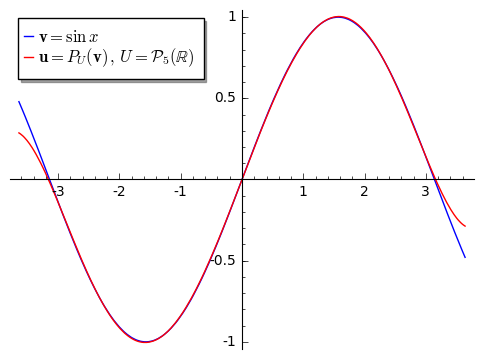

In [43]:
psin = plot(sin(x), (x,-pi-0.5,pi+0.5),color='blue',legend_label='$\mathbf{v} = \sin\,x$');
pu = plot(ur, -pi-0.5,pi+0.5,color='red',legend_label='$\mathbf{u}=P_{U}({\mathbf{v}})\,,\, U={\cal P}_5(\mathbb{R})$'); 
(psin+pu).show(figsize=5)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Μια άλλη γνωστή προσέγγιση της συνάρτησης $\sin x$ με πολυώνυμο βαθμού 5, είναι το πολυώνυμο Taylor τάξης 5, κοντά στο 0.
</p>

In [44]:
tsin = taylor(sin(x),x,0,5) ; print tsin

1/120*x^5 - 1/6*x^3 + x


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Για να συγκρίνουμε πόσο καλή είναι η προσέγγιση της $\sin x$ με το πολυώνυμο Taylor στο διάστημα $[-\pi,\pi]$ και με το πολυώνυμο ${\rm u}$ που βρήκαμε με την γραμμική άλγεβρα   απεικονίζουμε και τις τρεις συναρτήσεις στο ίδιο γραφικό.
</p>

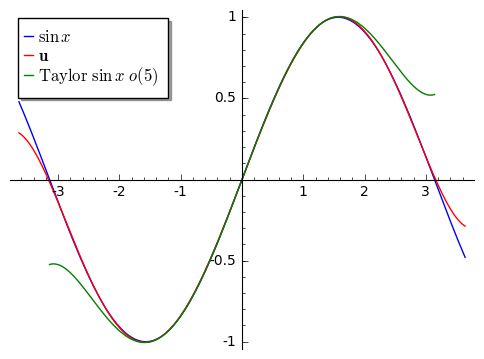

In [45]:
psin = plot(sin(x), (x,-pi-0.5,pi+0.5),color='blue',legend_label='$\sin\,x$');
pu = plot(ur, -pi-0.5,pi+0.5,color='red',legend_label='$\mathbf{u}$'); 
ptsin = plot(tsin,-pi,pi,color='green',legend_label='$\mathrm{Taylor} \,\,\sin \,x\,\,o(5)$')
(psin+pu+ptsin).show(figsize=5)

In [46]:
print sin(3.);
print ur(x=3).n()
print tsin(x=3).n()

0.141120008059867
0.142535987873723
0.525000000000000


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Παίρνοντας $x=3$, το πολυώνυμο ${\rm u}$ προσεγγίζει την ακριβή τιμή $\sin 3$, με λάθος περίπου ίσο με $0.001$, ενώ το λάθος της προσέγγισης του πολυωνύμου Taylor είναι εκατοντάδες φορές μεγαλύτερο! Μόνο κοντά στο $x=0$ το πολυώνυμο Taylor προσεγγίζει την $\sin x$ ικανοποιητικά. <br> <br>Η γραμμική άλγεβρα μας βοήθησε να ανακαλύψουμε μια νέα προσέγγιση της συνάρτησης $\sin x$ η οποία βελτιώνει την προσέγγιση που μάθαμε στον απειροστικό λογισμό. Όμως, δίχως την δυνατότητα που μας παρέχει το Sage να εκτελούμε δίχως λάθη συμβολικούς κι αριθμητικούς υπολογισμούς είναι εξαιρετικά επίπονο, αν όχι ακατόρθωτο, να υλοποιήσουμε στην πράξη τα θεωρητικά αποτελέσματα.
</p>